# Работа и изображениями в Python

## Чтение, запись и работа с пикселями

* Ч-б изображение для пикселя B[0, 255]
* Цветоное изображение для пикселя RGB [0, 255]

In [2]:
%matplotlib inline

from skimage.io import imread, imshow, imsave

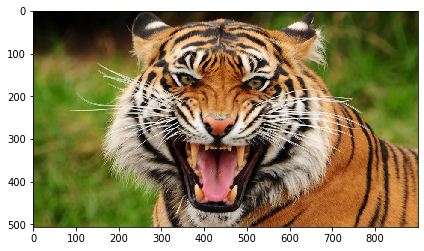

In [3]:
img = imread('data/tiger.jpg')
imshow(img)

Высота, ширина, каналы

In [7]:
img.shape

(506, 900, 3)

Отдельный пиксель

In [10]:
img[200, 150]

Array([ 99, 135,  29], dtype=uint8)

Отдельный канал

In [9]:
img[200, 150, 1]

135

Присвоение цвет пикселю

In [11]:
img[200, 150] = [255, 255, 0]

Сохранение в файл

In [13]:
imsave('data/new_tiger.jpg', img)

Работа с частями изображения

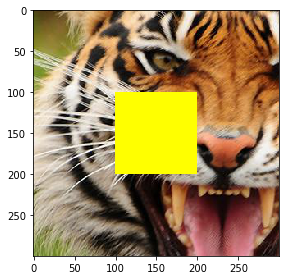

In [23]:
img[200:300, 300:400] = [255, 255, 0]
imshow(img[100:400, 200:500])

Копирование изображения

In [24]:
img_c = img.copy()

## Арифметические операции

In [66]:
img = imread('data/1.tiger.jpg')

Так как изображение хранит цвет в 1 байте, то при операциях может происходить переполнение = ошибки.
Поэтому преобразуем хранение в float

In [67]:
from skimage import img_as_float

In [68]:
img_f = img_as_float(img)

In [79]:
img.min(), img.max()

(0, 255)

### Контрастность - умножение

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


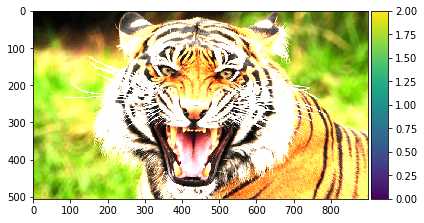

In [77]:
imshow(img_f * 2)

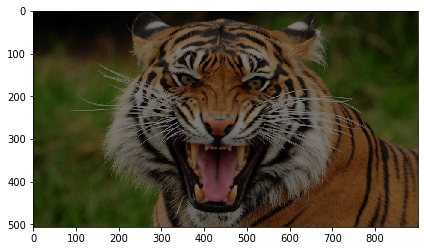

In [78]:
imshow(img_f / 2)

### Яркость - сложение

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


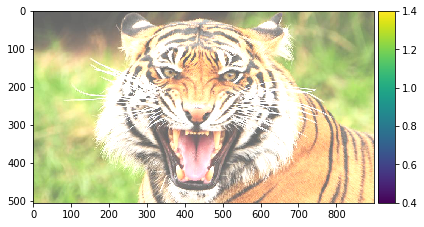

In [83]:
imshow(img_f + 0.4)

### Обрезание краёв

In [85]:
from numpy import clip

Чтобы не выходить за края - используем clip

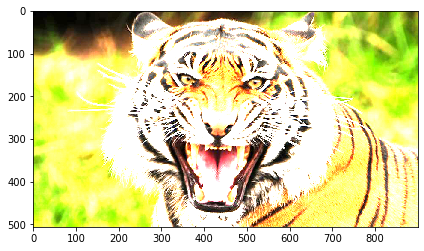

In [86]:
imshow(clip(img_f*3, 0, 1))

### Преобразование обратно в целые числа

In [98]:
from skimage import img_as_ubyte

### Извлечение отдельных каналов

In [91]:
r = img_f[:, :, 0]
g = img_f[:, :, 1]
b = img_f[:, :, 2]

Ввод изображения в отдельном канале

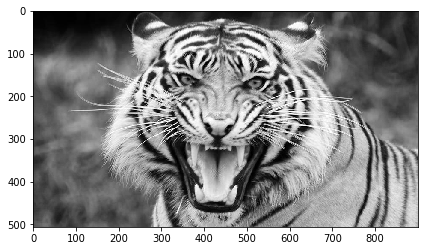

In [92]:
imshow(r)

### Сосдание изображения из каналов

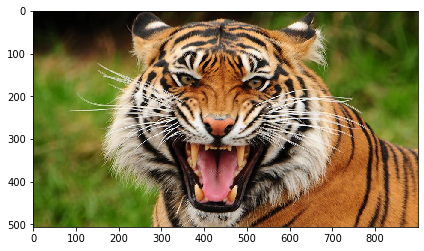

In [94]:
from numpy import dstack

img_col = dstack((r, g, b))
imshow(img_col)

### Усреднение каналов

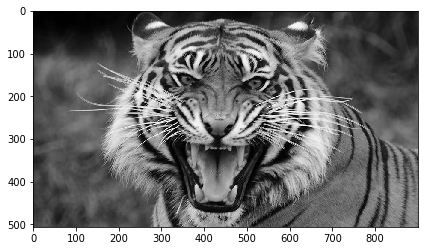

In [95]:
img_avr = (r + g + b) / 3
imshow(img_avr)

### Получение яркости изображения

Усреднение просто, но не соответсвует нашему восприятию из-за нормального распределения яркости относительно цветов.

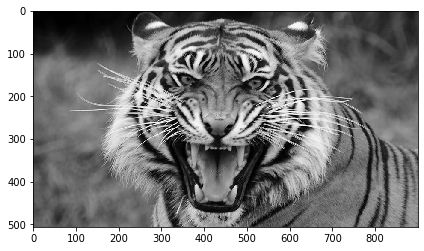

In [96]:
from skimage.color import rgb2gray

img_gray = rgb2gray(img)
imshow(img_gray)

### Совмещение каналов фотографии Проскудина-Горского

Совмещение в цветную картинку 3х черно-белых в разных каналов

In [499]:
img = img_as_float(imread('data/2.00.png'))
empty = np.array([[[0]] * img1.shape[1]] * img1.shape[0])

h = int(img.shape[0] / 3)
w = img.shape[1]

border_p = 5

delta_h = int(h * border_p / 100.)
delta_w = int(w * border_p / 100.)

img = img[:, delta_w:w-delta_w]

img3 = img[0:h, :][delta_h:h-delta_h, :]
img2 = img[h:2*h, :][delta_h:h-delta_h, :]
img1 = img[2*h:3*h, :][delta_h:h-delta_h, :]

In [504]:
def split_img(img1, img2):
    slice_s = 15
    
    corr_max = -100
    i_max = 0
    
    for i in range(-slice_s, slice_s + 1):
        img2_r = np.roll(img2, i, axis=0)
        
        corr = (img1 * img2_r).sum()
        
        if (corr > corr_max):
            corr_max = corr
            i_max = i
            
    corr_max = 0
    j_max = 0
    
    img2_r = np.roll(img2, i_max, axis=0)
    for j in range(-slice_s, slice_s + 1):
        img2_rr = np.roll(img2_r, j, axis=1)
        
        corr = (img1 * img2_rr).sum()
        
        if (corr > corr_max):
            corr_max = corr
            j_max = j
            
    return [i_max, j_max]

def full(img11, img12, img13):
    img_full = np.dstack((img11, img12, img13))
    imshow(img_full)

In [521]:
slice12 = split_img(img2, img1)
img1_r = np.roll(img1, slice12[0], axis=0)
img1_r = np.roll(img1_r, slice12[1], axis=1)

In [522]:
slice23 = split_img(img2, img3)
img3_r = np.roll(img3, slice23[0], axis=0)
img3_r = np.roll(img3_r, slice23[1], axis=1)

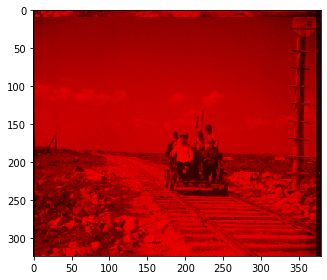

In [524]:
full(img1_r, empty, empty)

In [282]:
def align(img, g_coord):
    row_g, col_g = g_coord
    
    img = imread('img.png')

    h = int(img.shape[0] / 3)
    w = img.shape[1]

    delta_w = int(w * 0.05)
    delta_h = int(h * 0.05)

    img = img_as_float(img)[:, delta_w:w-delta_w]
    img1 = img[0:h, :][delta_h:h-delta_h, :]
    img2 = img[h:2*h, :][delta_h:h-delta_h, :]
    img3 = img[2*h:3*h, :][delta_h:h-delta_h, :]
    
    slice12 = split_img(img2, img1)
    slice23 = split_img(img2, img3)
    
    row_r = row_b = row_g
    col_r = col_b = col_g
    
    row_r += slice2[0]
    col_r += slice2[1]
    
    row_b += slice1[0]
    col_b += slice1[1]
    
    return (row_b, col_b), (row_r, col_r)


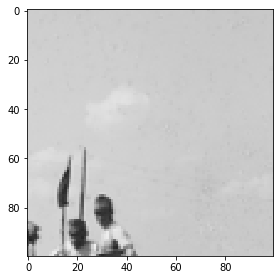

In [528]:
imshow(img[450:550, 200:300])

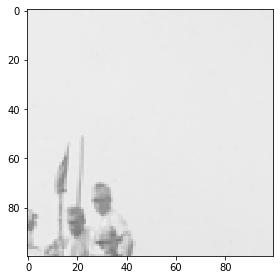

In [529]:
imshow(img[100:200, 200:300])

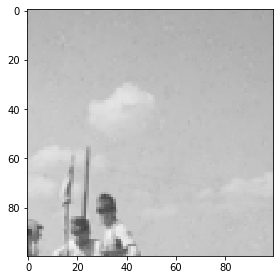

In [532]:
imshow(img[800:900, 200:300])